# [Chapter 7](http://www.greenteapress.com/thinkbayes/html/thinkbayes008.html)
## Prediction

### Boston Bruins problem

In [2]:
from __future__ import print_function, division

% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite, Joint, EvalPoissonPmf
import thinkplot

import scipy.stats

In [3]:
def MakeGaussianPmf(mu, sigma, num_sigmas, n=101):
    pmf = Pmf()
    
    low = mu - num_sigmas * sigma
    high = mu + num_sigmas * sigma
    
    for x in np.linspace(low, high, n):
        p = scipy.stats.norm.pdf(x, mu, sigma)
        pmf[x] = p
    
    pmf.Normalize()
    
    return pmf

In [4]:
def MyEvalPoissonPmf(k, lam):
    return (lam)**k * math.exp(-lam) / math.factorial(k)

def MyEvalExponentialPdf(x, lam):
    return lam * math.exp(-lam * x)

In [5]:
class Hockey(Suite):
    def __init__(self, name='team'):
        self.team_name = name
        pmf = MakeGaussianPmf(2.8, 0.3, 4)
        Suite.__init__(self, pmf)
        
    def Likelihood(self, data, hypo):
        lam = hypo
        k = data
        like = EvalPoissonPmf(k, lam)
        return like

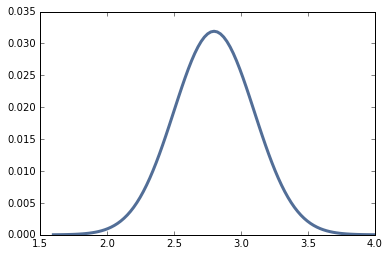

In [6]:
thinkplot.Pdf(Hockey())

In [10]:
Hockey()

Hockey({1.8159999999999998: 0.0001471859256820753, 2.5840000000000001: 0.024629411277034462, 3.7839999999999998: 0.0001471859256820753, 4.0: 1.0706987740219133e-05, 1.9359999999999999: 0.0005045649577276101, 2.7759999999999998: 0.03181510920465816, 1.6239999999999999: 1.4697781854549138e-05, 3.5440000000000005: 0.0014739432747931382, 3.5680000000000005: 0.0012048334108985801, 3.3520000000000003: 0.0058728574794542979, 3.2800000000000002: 0.0088741389343110384, 3.2560000000000002: 0.010053705863454436, 2.6080000000000001: 0.02600636482875425, 3.976: 1.4697781854549085e-05, 1.8399999999999999: 0.00019073720453502275, 2.8479999999999999: 0.031511145516434448, 3.1600000000000001: 0.015535710996105297, 2.512: 0.020132618469661301, 3.8799999999999999: 4.8954759109908192e-05, 2.1040000000000001: 0.0021639631001853852, 3.6400000000000006: 0.00063326982057218745, 3.0640000000000001: 0.021670270738441941, 2.4159999999999999: 0.014068542958702294, 1.6479999999999999: 2.0047342235849279e-05, 2.008

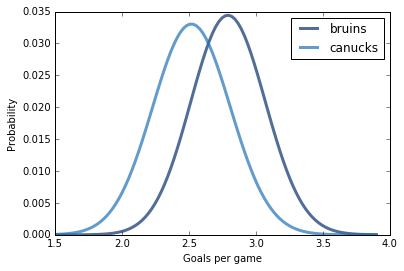

In [27]:
suite1 = Hockey('bruins')
suite1.UpdateSet([0, 2, 8, 4])

suite2 = Hockey('canucks')
suite2.UpdateSet([1, 3, 1, 0])

thinkplot.Pdf(suite1, label=suite1.team_name)
thinkplot.Pdf(suite2, label=suite2.team_name)

thinkplot.Config(
    legend=True,
    xlabel='Goals per game',
    ylabel='Probability'
)